# Python Assignment 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data = pd.read_excel("Ass-Data.xlsx")

## Sample Data

In [4]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1.What is the overall average tip?

In [5]:
data['tip'].mean()

2.9982786885245902

### 2.Get a numerical summary for 'tip' - are the median and mean very different? What does this tell you about the field?

In [6]:
data['tip'].median()

2.9

Hence, Median & mean are almost same.

If the distribution is symmetric then the mean is equal to the median and the distribution will have zero skewness

### 3.Prepare a boxplot for 'tip', are there any outliers?  

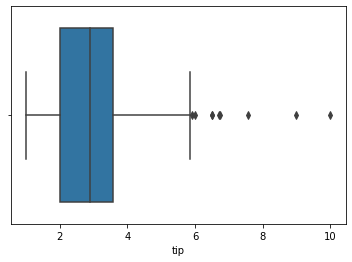

In [7]:
sns.boxplot(x="tip", data=data)

In [8]:
q3, q1 = np.percentile(data.tip, [75,25])

iqr = q3 - q1
iqr = round(iqr,2)

print ("Lower Quatile:- ", q1 )
print ("Lower Quatile:- ", q3 )
print ("IQR:- ", iqr )
l = q1 - (1.5*iqr)
u = q1 + (1.5*iqr)
l = round(l,2)
u = round(u,2)
print("Lower range in boxplot is {}, & the upper range is, {}".format(l,u))

Lower Quatile:-  2.0
Lower Quatile:-  3.5624999999999996
IQR:-  1.56
Lower range in boxplot is -0.34, & the upper range is, 4.34


### 4.Prepare a boxplot for 'total_bill', are there any outliers?

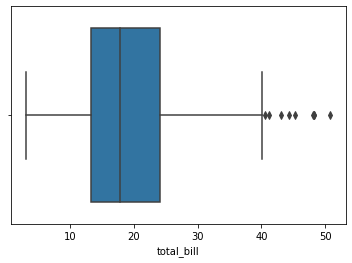

In [9]:
sns.boxplot(x="total_bill", data = data)

In [10]:
q3, q1 = np.percentile(data.total_bill, [75,25])

iqr = q3 - q1
iqr = round(iqr,2)

print ("Lower Quatile:- ", q1 )
print ("Lower Quatile:- ", q3 )
print ("IQR:- ", iqr )
l = q1 - (1.5*iqr)
u = q1 + (1.5*iqr)
l = round(l,2)
u = round(u,2)
print("Lower range in boxplot is {}, & the upper range is, {}".format(l,u))

Lower Quatile:-  13.3475
Lower Quatile:-  24.127499999999998
IQR:-  10.78
Lower range in boxplot is -2.82, & the upper range is, 29.52


### 5. Gender: what is the percent of females in the data?

In [15]:
data.groupby('sex').size()

sex
Female     87
Male      157
dtype: int64

In [16]:
x = data.groupby("sex").size()
t = data["sex"].count()
p = x/t * 100
p[0]

35.65573770491803

### 6.Prepare a bar plot with the bars representing the percentage of records for each gender.

In [19]:
cnt = data.groupby(['sex']).count().reset_index()
cnt

,sex,total_bill,tip,smoker,day,time,size,count_perc
0,Female,87,87,87,87,87,87,87
1,Male,157,157,157,157,157,157,157


In [9]:
cnt['count_perc'] = (cnt['total_bill']/ len(data)) *100
cnt

,sex,total_bill,tip,smoker,day,time,size,count_perc
0,Female,87,87,87,87,87,87,35.655738
1,Male,157,157,157,157,157,157,64.344262


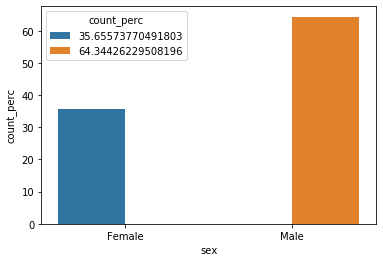

In [10]:
sns.barplot(x="sex",y='count_perc',
            hue = 'count_perc'
            ,data = cnt)

([<matplotlib.patches.Wedge at 0x19e39cb17f0>,
 [Text(-0.9901862461361194, 0.47909414311057974, 'Female'),
  Text(0.990186290992146, -0.47909405040265074, 'Male')],
 [Text(-0.5401015888015196, 0.2613240780603162, '35.7%'),
  Text(0.5401016132684432, -0.2613240274923549, '64.3%')])

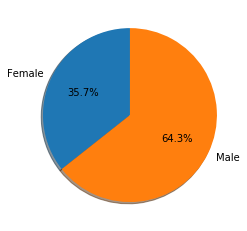

In [11]:
cnt = data.groupby(['sex']).count().reset_index()
cnt
cnt['count_perc'] = (cnt['total_bill']/ len(data)) *100 

plt.pie(x='count_perc',data=cnt,labels=['Female', 'Male'], autopct='%1.1f%%',
       shadow=True, startangle=90)


### 7.Does the average tip differ by gender? Does one gender tip more than the other?

In [18]:
data.groupby(["sex"]).mean()['tip']

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64

yes, the avg value of male tip is greater than female tip

### 8. Does the average tip differ by the time of day?

In [19]:
data.groupby(["day","time"]).mean()['tip']

day   time  
Fri   Dinner    2.940000
      Lunch     2.382857
Sat   Dinner    2.993103
Sun   Dinner    3.255132
Thur  Dinner    3.000000
      Lunch     2.767705
Name: tip, dtype: float64

In [20]:
data.groupby(["day"]).mean()['tip']

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

In [21]:
data.groupby(["time"]).mean()['tip']

time
Dinner    3.102670
Lunch     2.728088
Name: tip, dtype: float64

### 9. Does the average tip differ by size (number of people at the table)?

In [22]:
data.groupby('size').mean()['tip']

size
1    1.437500
2    2.582308
3    3.393158
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64

### 10. Do smokers tip more than non-smokers?

In [23]:
data.groupby('smoker').sum()['tip']

smoker
No     451.77
Yes    279.81
Name: tip, dtype: float64

### 11. Gender vs. smoker/non-smoker and tip size - create a 2 by 2 and get the average tip size. Which group tips the most?

In [24]:
data.groupby(['sex','smoker']).mean()['tip']

sex     smoker
Female  No        2.773519
        Yes       2.931515
Male    No        3.113402
        Yes       3.051167
Name: tip, dtype: float64

### 12.Create a new metric called 'pct_tip' = tip/ total_bill - this would be percent tip give, and should be a better measure of the tipping behaviour.

In [25]:
data['pct_tip'] = data['tip']/data['total_bill']

### 13. Does pct_tip differ by gender? Does one gender tip more than the other?

In [26]:
data.groupby(["sex"]).sum()['pct_tip']

sex
Female    14.484694
Male      24.751136
Name: pct_tip, dtype: float64

### 14. Does pct_tip differ by size (number of people at the table)?

In [27]:
data.groupby(["size"]).sum()['pct_tip']

size
1     0.869168
2    25.852194
3     5.781960
4     5.400113
5     0.707477
6     0.624917
Name: pct_tip, dtype: float64

### 15. Make the gender vs. smoker view using pct_tip - does your inference change?

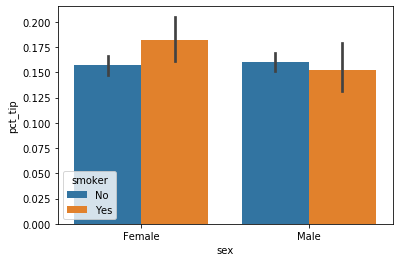

In [131]:
data['sex'].groupby(data["smoker"]).value_counts(normalize=True).rename('pct_tip').reset_index()


x,y,hue = 'sex','pct_tip','smoker'

sns.barplot(x,y,hue,data=data)


### 16. Make a scatter plot of total_bill vs. tip.

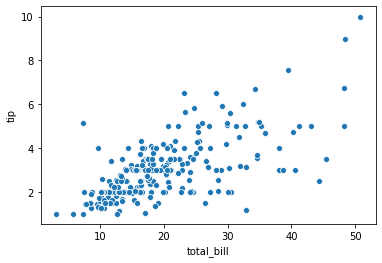

In [30]:
sns.scatterplot(x="total_bill", y = "tip",
               data = data)

### 17. Make a scatter plot of total_bill vs. pct_tip.

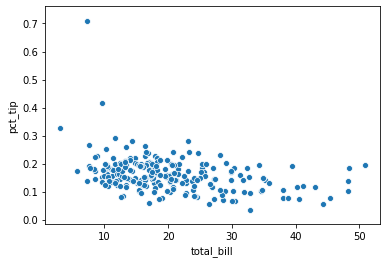

In [31]:
sns.scatterplot(x="total_bill", y = "pct_tip",
               data = data)

In [32]:
data["smoker"].count()

244